In [63]:
import numpy as np
np.random.seed(0)
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

from PROJECT_SETUP import ROJECT_ROOT_DIR
from RegLib.load_save_data import load_data_as_dict
from RegLib.HelperFunctions import plot_values_with_two_y_axis, plot_values_with_info, save_figure

In [2]:
data_dict = load_data_as_dict(ROJECT_ROOT_DIR.joinpath("test_sdg", "param_search_results.json"))

In [3]:
early_stop = [None] * len(data_dict["param"])
lr = [None] * len(data_dict["param"])

tuples_data = [None] * len(data_dict["param"])
for i in range(len(data_dict["param"])):
    val = data_dict["param"][i]
    early_stop[i] = val['OPTIM.EARLY_STOP_LR_STEP']
    lr[i] = val['OPTIM.LR']
    tuples_data[i] = (lr[i], early_stop[i])

data = {"lr": lr, "early_stop":early_stop, "results": data_dict["results"]}
df = pd.DataFrame.from_dict(data)
df

,lr,early_stop,results
0,0.1000,-1.000000e+00,8.698892
1,0.0100,-1.000000e+00,0.139201
2,0.0010,-1.000000e+00,0.028430
3,0.0001,-1.000000e+00,0.024454
4,0.1000,1.000000e-05,8.698892
5,0.0100,1.000000e-05,0.139201
6,0.0010,1.000000e-05,0.106286
7,0.0001,1.000000e-05,0.208542
8,0.1000,1.000000e-08,8.698892
9,0.0100,1.000000e-08,0.139201


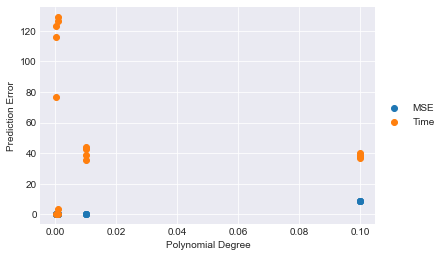

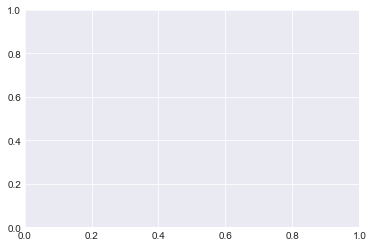

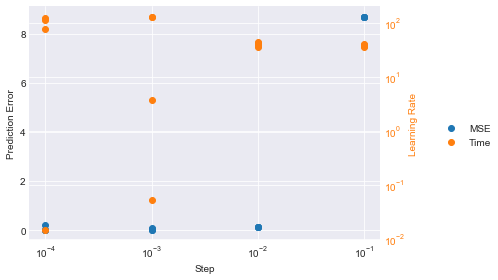

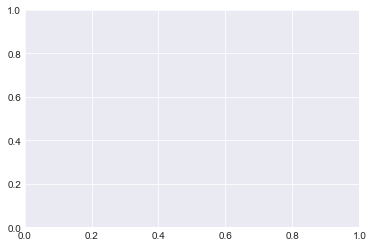

In [5]:
values_to_plot_y1 = {"MSE": data_dict["results"]}
values_to_plot_y2 = {"Time": data_dict["times"]}
values_to_plot = {"MSE": data_dict["results"], "Time": data_dict["times"]}
plot_values_with_info(lr, values_to_plot, scatter = True)
plot_values_with_two_y_axis(lr, values_to_plot_y1, values_to_plot_y2, xscale = "log", scatter = True)

In [58]:
index = pd.MultiIndex.from_tuples(tuples_data)
s_results = pd.Series(data_dict["results"], index=index)
s_results = s_results.unstack(level=-1)

s_time = pd.Series(data_dict["times"], index=index)
s_time = s_time.unstack(level=-1)

,-1.000000e+00,1.000000e-10,1.000000e-08,1.000000e-05
0.0001,123.343413,116.120360,76.531376,0.014925
0.0010,126.624177,129.118588,3.732933,0.053689
0.0100,39.086497,44.202554,42.419698,35.712237
0.1000,38.120797,38.468661,36.609204,40.049082


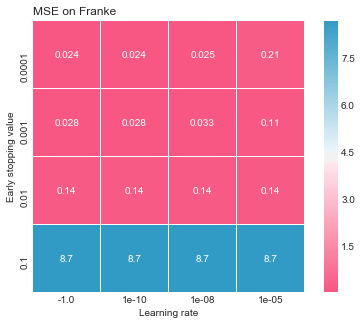

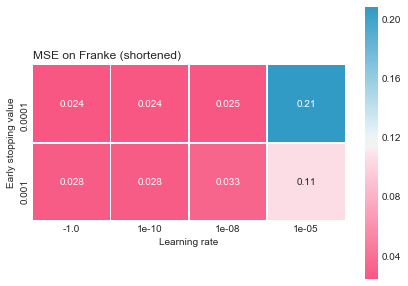

In [65]:
def show_heatmap(data, title, xlabel, ylabel, show_bar = True, save_fig = False):
    cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(figsize=(7, 5))

    sb.heatmap(data, annot=True, linewidth=0.3, cbar = show_bar, cmap=cmap, square=True)  #  annot=True, fmt=".2f", 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title(title, loc='left', fontsize=12, fontweight=0)

    if save_fig:
        save_figure(title)
    else: 
        plt.show()

    plt.show()

show_heatmap(s_results, title = "MSE on Franke", xlabel = 'Learning rate', ylabel = 'Early stopping value', show_bar = True, save_fig = True)
show_heatmap(s_results.head(-2), title = "MSE on Franke (shortened)", xlabel = 'Learning rate', ylabel = 'Early stopping value', show_bar = True, save_fig = True)

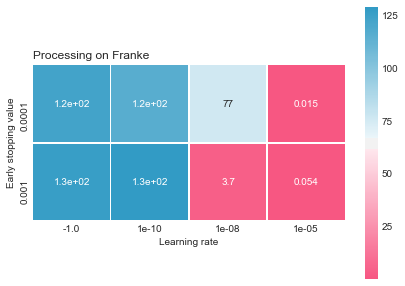

In [66]:
show_heatmap(s_time.head(-2), title = "Processing on Franke", xlabel = 'Learning rate', ylabel = 'Early stopping value', show_bar = True, save_fig = True)


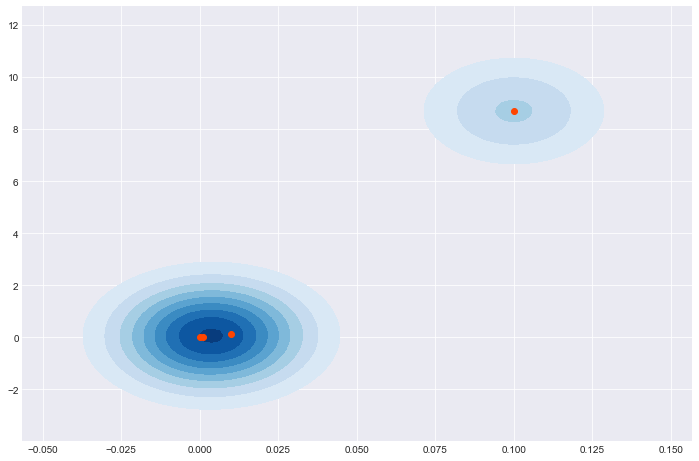

In [38]:
fig, ax = plt.subplots(1, figsize=(12,8))
n = 12
x_axis = lr[n:]
y_axis = data_dict["results"][n:]
sb.kdeplot(x_axis, y_axis, cmap='Blues',
           shade=True, shade_lowest=False)
plt.scatter(x_axis, y_axis, color='orangered')
plt.show()

In [1]:
from NeuralNetwork.SGD import SGD as SGD
from RegLib.HelperFunctions import create_frankie_data, create_X, plot_values_with_info
from NeuralNetwork.config import Config
from PROJECT_SETUP import ROJECT_ROOT_DIR
from RegLib.load_save_data import load_best_checkpoint

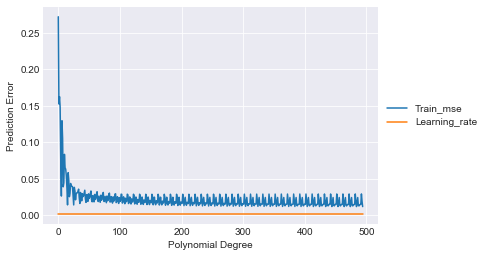

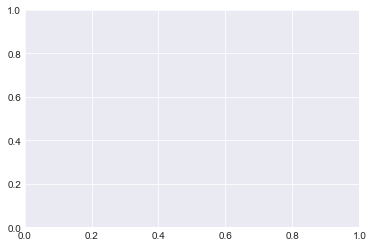

In [24]:
cfg = Config()

output_dir = ROJECT_ROOT_DIR.joinpath(cfg.OUTPUT_DIR)
best_data_dict = load_best_checkpoint(output_dir)
# print(len(list(best_data_dict["Train_mse"].values())))
# print(len(list(best_data_dict["Train_r2"].values())))
# print(len(list(best_data_dict["Learning_rate"].values())))
# print(len([x for x in range(best_data_dict["Step"] + 1)]))
values_to_plot = {
    "Train_mse": list(best_data_dict["Train_mse"].values()),
    #"Train_r2": list(best_data_dict["Train_r2"].values()),
    "Learning_rate": list(best_data_dict["Learning_rate"].values()),
}
plot_values_with_info([x for x in range(best_data_dict["Step"] + 1)], values_to_plot)

In [3]:
def create_test_data():
    N = 20
    noise_strength = 0.1
    p = 1

    x, y, z = create_frankie_data(2018, N, noise_strength)
    X = create_X(x, y, p)
    return X, z
X, z = create_test_data()
X.shape

(400, 3)

In [ ]:
def forward(self, X: np.ndarray) -> np.ndarray:
    self.activations[0] = X
    # For all layers except the last one
    for layer in range(self.num_of_layers - 1):
        self.zs[layer] = np.dot(self.activations[layer], self.ws[layer])
        self.activations[layer + 1] = self.sigmoid(self.zs[layer])
    
    last_layer = self.num_of_layers - 1
    self.zs[last_layer] = np.dot(self.activations[last_layer], self.ws[last_layer])
    y_pred = self.activations[last_layer]
    return y_pred